# Распределение хи-квадрат
Мат. ожидание = k , дисперсия = 2k

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Создадим выборку объема 1000 из распределения хи-квадрат

In [65]:
k = 6
chi_square = sts.chi2(k)
arr = chi_square.rvs(1000)

Построим гистограмму и график теоретической плотности распределения

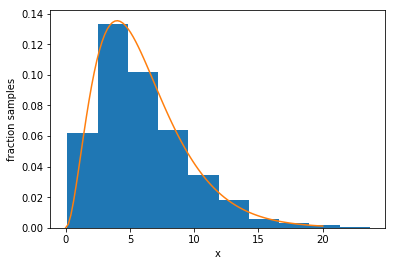

In [66]:
plt.hist(arr, normed=True)
plt.ylabel('fraction samples')
plt.xlabel('x')
x = np.linspace(0, 20, 100)
pdf = chi_square.pdf(x)
plt.plot(x,pdf)


Создадим две вспомогательные функции
get_mean(n) - вернет массив выборочных средних размера 1000, полученных из выборок объема n
plot_things(n) - строит гистограмму, соответствующую массиву выборочных средних и рисует поверх нее график плотности нормального распределения с параметрами $EX=k$ , $\sigma=sqrt(2k/n)$ 

In [69]:
def get_mean(n):
    sample_mean = []
    for i in range(1, 1001):
        tmp = chi_square.rvs(n)
        sample_mean.append(np.mean(tmp))
    return sample_mean
def plot_things(n):
    plt.figure(n)
    plt.hist(get_mean(n), normed=True, bins=15, label='n = ' + str(n))
    x = np.linspace(0, 20, 100)
    norm_pdf = sts.norm(loc=k, scale=math.sqrt(2*(k+0.0)/n)).pdf(x)
    plt.plot(x, norm_pdf)
    plt.ylabel('fraction samples')
    plt.xlabel('x')
    plt.legend(loc='upper left')
    

Построим графики для разных n

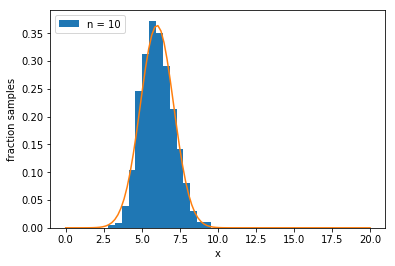

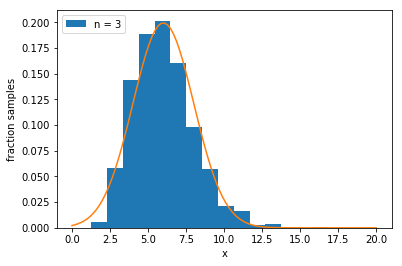

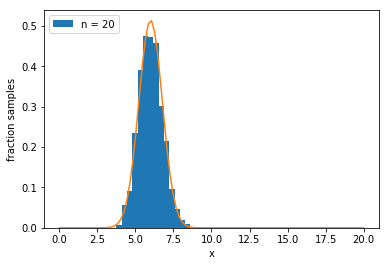

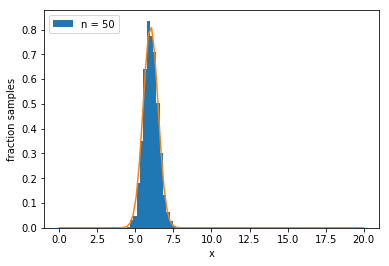

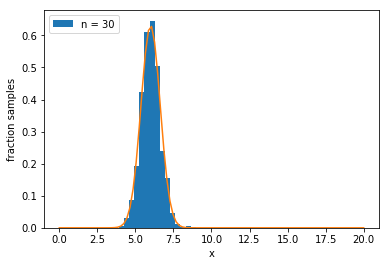

In [70]:
plot_things(3)
plot_things(10)
plot_things(20)
plot_things(30)
plot_things(50)

Из графиков выше видно, что точность аппроксимации распределения выборочных средних растет с ростом n